# importing libraries


In [3]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import numpy as np # linear algebra
import matplotlib.pyplot as plt

# Read the files.

In [4]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

# Shape of the training and test data.

In [5]:
print(f"Shape of training dataset:{train_data.shape}")
print(f"shape of test dataset:{test_data.shape}")

Shape of training dataset:(7274, 3)
shape of test dataset:(1819, 2)


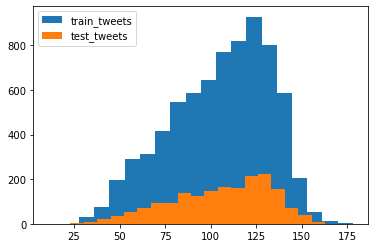

In [6]:
length_train = train_data['tweet'].str.len() 
length_test = test_data['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

# Look Into Training and Test data

In [8]:
print(f"Training dataset")
train_data.head()

Training dataset


,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [9]:
print(f"Test dataset")
test_data.head()

Test dataset


,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


# Fetching sentiments from training data

 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

In [10]:
training_sentiments=dict(train_data['sentiment'].value_counts())
training_sentiments

{1: 4311, 2: 2382, 0: 456, 3: 125}

# Plot distribution of sentiments 

Text(0.5, 1.0, 'Distribution of Sentiments')

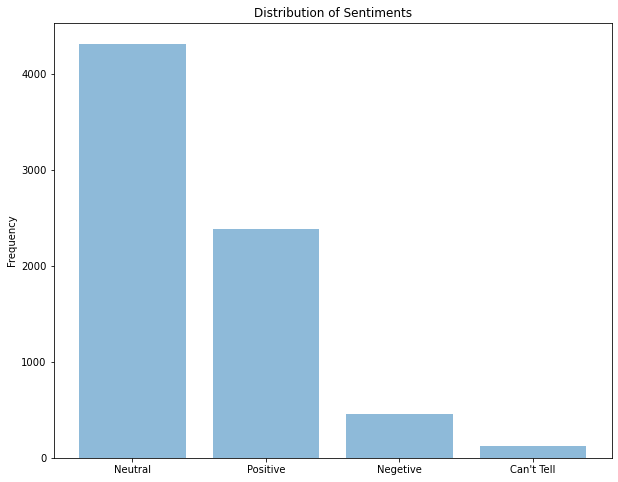

In [11]:
objects = ('Neutral', 'Positive', 'Negetive', 'Can\'t Tell')
y_pos = np.arange(len(training_sentiments))
plt.figure(figsize=(10,8))
plt.bar(y_pos, training_sentiments.values(), align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments')

#  Create dataframe for tweets of training dataset

In [12]:
#  Create dataframe for tweets of training dataset
tweets = pd.DataFrame(train_data['tweet'],columns =['tweet'])

In [13]:
tweets.shape


(7274, 1)

# Creating wordcloud for sentiments

In [13]:
pip install wordcloud


wordcloud for sentiments 0



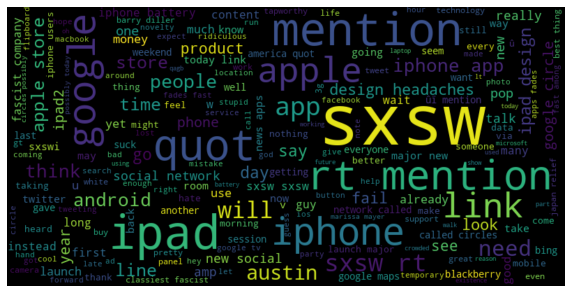


wordcloud for sentiments 1



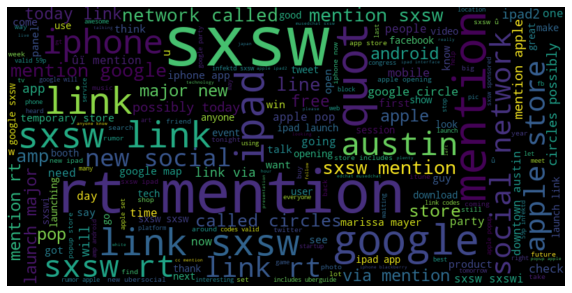


wordcloud for sentiments 2



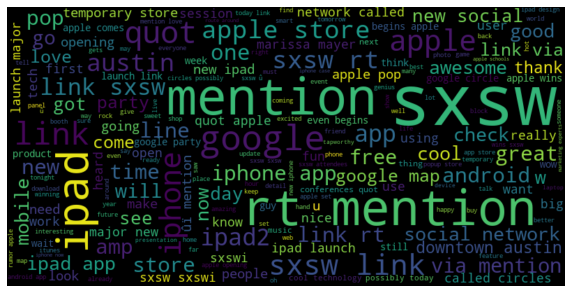


wordcloud for sentiments 3



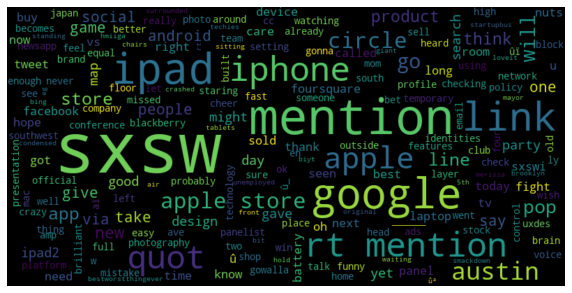

In [14]:
from wordcloud import WordCloud

def create_wordcloud(sentiments):
  wordcloud = WordCloud(background_color='black',
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)
  
  for i in range(len(sentiments)):
    print()
    print("wordcloud for sentiments", i)
    print()

    wordcloud.generate(sentiments[i])
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

sentiment_neutral  = ' '.join([str(text).lower() for text in train_data.loc[train_data['sentiment'] == 1, 'tweet']])
sentiment_positive = ' '.join([str(text).lower() for text in train_data.loc[train_data['sentiment'] == 2, 'tweet']])
sentiment_negative = ' '.join([str(text).lower() for text in train_data.loc[train_data['sentiment'] == 0, 'tweet']])
sentiment_unknown  = ' '.join([str(text).lower() for text in train_data.loc[train_data['sentiment'] == 3, 'tweet']])
sentiments = [sentiment_negative, sentiment_neutral, sentiment_positive, sentiment_unknown]
create_wordcloud(sentiments)

In [27]:
train_data.describe()

,tweet_id,sentiment
count,7274.000000,7274.000000
mean,4531.736871,1.299148
std,2617.858745,0.607829
min,2.000000,0.000000
25%,2261.500000,1.000000
50%,4530.500000,1.000000
75%,6796.750000,2.000000
max,9092.000000,3.000000


In [15]:
# Find ReTweets
tweets['is_retweet'] = tweets['tweet'].astype(str).apply(lambda x: x[:2]=='RT')

tweets['is_retweet'].sum()

1586

In [16]:
# Finding top most repeated tweets
tweets.groupby(['tweet']).size().reset_index(name = 'counts').sort_values(by = 'counts',ascending=False).head(10)

,tweet,counts
5069,RT @mention Marissa Mayer: Google Will Connect...,5
5068,RT @mention Marissa Mayer: Google Will Connect...,4
4782,RT @mention Google to Launch Major New Social ...,3
3800,Need to buy an iPad2 while I'm in Austin at #s...,2
1669,"Before It Even Begins, Apple Wins #SXSW {link}",2
5692,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",2
5690,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,2
3651,Marissa Mayer: Google Will Connect the Digital...,2
4781,RT @mention Google to Launch Major New Social ...,2
2999,I just noticed DST is coming this weekend. How...,2


C:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-21-86546505698d>:10: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


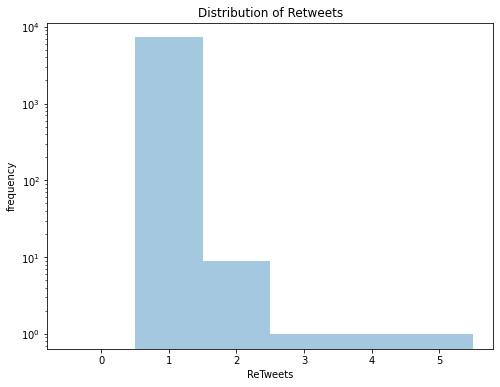

In [21]:
#  Distribution of ReTweets
import seaborn as sns

counts = tweets.groupby(['tweet']).size().reset_index(name='counts').counts
plt.figure(figsize=(8,6))
sns.distplot(counts, bins = np.arange(0,counts.max()+2, 1)-0.5, kde=False)
plt.xlabel('ReTweets')
plt.ylabel('frequency')
plt.title('Distribution of Retweets')
plt.yscale('log', nonposy='clip')
plt.show()

In [22]:
#  Converting datatype of tweet column as string
tweets['tweet'] = tweets['tweet'].astype(str)

In [24]:
#  Functions to find Retweeted, Handlers and Hashtags
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [25]:
tweets['retweeted'] = tweets.tweet.apply(find_retweeted)
tweets['mentioned'] = tweets.tweet.apply(find_mentioned)
tweets['hashtags'] = tweets.tweet.apply(find_hashtags)

In [26]:
tweets.sample(10) 

,tweet,is_retweet,retweeted,mentioned,hashtags
3752,Enjoying a Google ice cream sandwich at the GS...,False,[],[],"[#welivehere, #gsdm, #SXSW]"
5350,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,True,[@mention],[],"[#edchat, #musedchat, #sxsw, #sxswi, #classica..."
4794,The only thing I got from this smarmcake #sxsw...,False,[],[],"[#sxsw, #Google, #ontologists, #ontologyshouto..."
3538,Just got given a free portable iPhone charger....,False,[],[],"[#powermat, #sxsw]"
590,Hey Jen what do you hear about Google Circles ...,False,[],[],[#SXSW]
1254,#NFC technology: Google's testing using stick...,False,[],[],"[#NFC, #sxsw]"
7112,Google's social network rumored to launch soon...,False,[],[],"[#GoogleCircles, #gsdm, #sxsw]"
3899,Damn! Apple knows how to do it like no other:...,False,[],[@mention],[#SXSW]
2993,"Check out Poked, Liked &amp; Re-Tweeted: A Goo...",False,[],[],"[#SXSW, #sxsw15, #sxswiC]"
7042,.@mention on #sxsw with a Cr48. there's so muc...,False,[],[@mention],[#sxsw]


In [27]:
#  Extract list of Hashtags and Handlers for wordcloud
def extraction(lists):
  data_array = []
  for data in lists:
    for word in data:
      if(word):
        data_array.append(word.lower())
  return data_array

In [28]:
hashtags = extraction(tweets['hashtags'])
handlers = extraction(tweets['mentioned'])
print(hashtags)

['#sxswnui', '#sxsw', '#apple', '#googledoodle', '#sxsw', '#sxsw', '#sxsw', '#fuckit', '#illmakeitwork', '#sxsw', '#technews', '#tech_news', '#apple', '#ipad_2', '#sxsw', '#tablets', '#tech', '#sxsw', '#ipad', '#ubersocial', '#iphone', '#sxsw', '#mashable', '#sxsw', '#freemusic', '#sxsw', '#sxsw', '#android', '#iphone', '#ipad', '#sxsw', '#elevate', '#sxsw', '#techenvy', '#sxsw', '#zazzlsxsw', '#companies', '#sxsw', '#apps', '#features', '#hardware', '#ipad', '#iphone', '#sxsw', '#calyp', '#calyp', '#sxsw', '#sxsw', '#apple', '#ipad2', '#technology', '#itunes', '#sxsw', '#sxsw', '#doubleloser', '#sxsw', '#sxsw', '#sxsw', '#sxsw', '#rise_austin', '#sxsw', '#circles', '#sxsw', '#circles', '#sxsw', '#sxsw', '#sxsw', '#sxsw', '#startups', '#vc', '#movie', '#awesome', '#sxsw', '#apple', '#sxsw', '#sxsw', '#sxsw', '#ipad', '#sxsw', '#ipad', '#sxsw', '#sxsw', '#sxsw', '#sxsw', '#deferomobile', '#ipad2', '#sxsw', '#sxsw', '#apple', '#ipad2', '#sxsw', '#fb', '#sxsw', '#android', '#iphone', '#sm

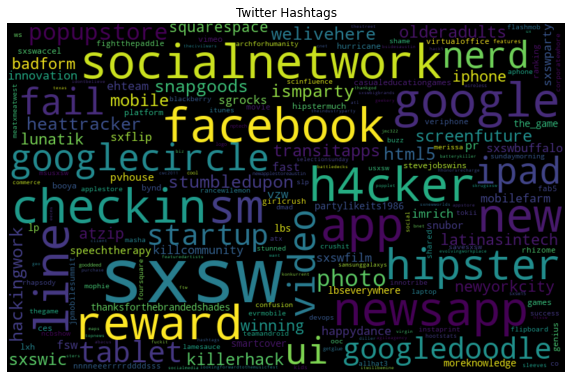

In [29]:
#  WordCloud for Hashtags
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,  background_color="black").generate(" ".join(set(hashtags)))
plt.figure(figsize=(10, 7))
plt.title('Twitter Hashtags')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Text(0, 0.5, 'frequency')

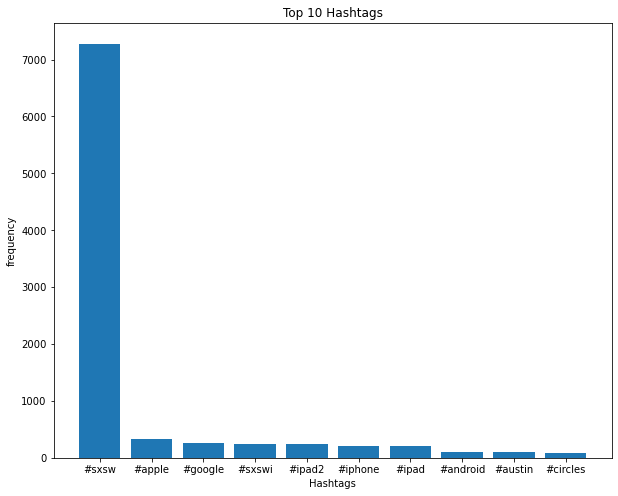

In [30]:
top_10_hashtags = dict(pd.Series(hashtags).value_counts()[:10])
plt.figure(figsize=(10,8))
plt.bar(top_10_hashtags.keys(),top_10_hashtags.values())
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('frequency')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

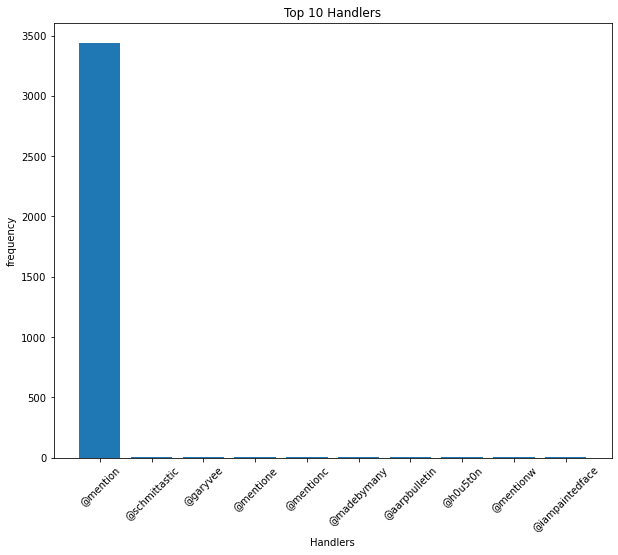

In [31]:
# Displaying frequently used Handlers 
top_10_handlers = dict(pd.Series(handlers).value_counts()[:10])
plt.figure(figsize=(10,8))
plt.bar(top_10_handlers.keys(),top_10_handlers.values())
plt.title('Top 10 Handlers')
plt.xlabel('Handlers')
plt.ylabel('frequency')
plt.xticks(rotation= 45)

In [32]:
actual_links = []
Invalid_links = []
for tweet in tweets['tweet']:
    urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweet)
    for url in urls:
        try:
            res = urllib.request.urlopen(url)
            actual_url = res.geturl()
            actual_links.append(actual_url)
        except:
            Invalid_links.append(url)

In [34]:
#  Extract Title from actual links
links = []
title = []
for link in actual_links:
  html = urllib.request.urlopen(link)
  soup = BeautifulSoup(html,'lxml')
  title_text = soup.title
  if title_text:
    links.append(link)
    title.append(title_text.get_text())
  
df1 = pd.DataFrame()
df1['Links'] = links
df1['title'] = title
df1

,Links,title


In [35]:
#  Extract Title from actual links
links = []
title = []
for link in actual_links:
  html = urllib.request.urlopen(link)
  soup = BeautifulSoup(html,'lxml')
  title_text = soup.title
  if title_text:
    links.append(link)
    title.append(title_text.get_text())
  
df1 = pd.DataFrame()
df1['Links'] = links
df1['title'] = title
df1

,Links,title


In [36]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# SadEmoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

In [37]:
#  Happy and Sad Emoticons list
Happy_Smiley = []
temp_tweets = []
Sad_Smiley = []
for i,tweet in enumerate(tweets.tweet):
  for smiley in emoticons_happy:
    for word in tweet.split():
      if smiley == word:
        temp_tweets.append(1)
        Happy_Smiley.append(smiley)
  for smiley in emoticons_sad:
    for word in tweet.split():
      if smiley == word:
        temp_tweets.append(0)
        Sad_Smiley.append(smiley)

In [38]:
#  Finding Happy and Sad Ratio
happy = [x for x in temp_tweets if x == 1 ]
sad = [x for x in temp_tweets if x == 0 ]
print(f"Total number of Happy Tweets= {len(happy)}")
print(f"Happy Ratio : {len(happy)/len(temp_tweets)}")
print()
print(f"Total number of Sad Tweets= {len(sad)}")
print(f"Sad Ratio : {len(sad)/len(temp_tweets)}")

Total number of Happy Tweets= 150
Happy Ratio : 0.8670520231213873

Total number of Sad Tweets= 23
Sad Ratio : 0.1329479768786127
